# <div align="center"><b> APSERa Simulation Pipeline for Cross Orthogonal Polarization </b></div>


## <div align="center"><b>  Modified Code With Dual Polarized Antenna </b></div>

In [160]:
frequencies = np.linspace(2,4,100) * u.GHz
print (frequencies)

[2.         2.02020202 2.04040404 2.06060606 2.08080808 2.1010101
 2.12121212 2.14141414 2.16161616 2.18181818 2.2020202  2.22222222
 2.24242424 2.26262626 2.28282828 2.3030303  2.32323232 2.34343434
 2.36363636 2.38383838 2.4040404  2.42424242 2.44444444 2.46464646
 2.48484848 2.50505051 2.52525253 2.54545455 2.56565657 2.58585859
 2.60606061 2.62626263 2.64646465 2.66666667 2.68686869 2.70707071
 2.72727273 2.74747475 2.76767677 2.78787879 2.80808081 2.82828283
 2.84848485 2.86868687 2.88888889 2.90909091 2.92929293 2.94949495
 2.96969697 2.98989899 3.01010101 3.03030303 3.05050505 3.07070707
 3.09090909 3.11111111 3.13131313 3.15151515 3.17171717 3.19191919
 3.21212121 3.23232323 3.25252525 3.27272727 3.29292929 3.31313131
 3.33333333 3.35353535 3.37373737 3.39393939 3.41414141 3.43434343
 3.45454545 3.47474747 3.49494949 3.51515152 3.53535354 3.55555556
 3.57575758 3.5959596  3.61616162 3.63636364 3.65656566 3.67676768
 3.6969697  3.71717172 3.73737374 3.75757576 3.77777778 3.79797

### Trial 1 of plotting antenna patterns

In [161]:
def gaussian_beam(theta, beam_width):
    return np.exp(-0.5 * (theta / np.radians(beam_width)) ** 2)

# Antenna parameters
beam_width_Azimuth = 30  # Beam width for antenna A (in azimuth) in degrees
beam_width_Elevation = 20  # Beam width for antenna A (in elevation) in degrees

beam_width_Azimuth_B = 20  # Beam width for antenna B (in azimuth) in degrees
beam_width_Elevation_B = 30  # Beam width for antenna B (in elevation) in degrees

# Theta values for calculating beam patterns
theta_range = np.linspace(-np.pi, np.pi, 1000)  # Range of angles from -pi to pi

# Calculate beam patterns for antenna A
beam_pattern_Azimuth = gaussian_beam(theta_range, beam_width_Azimuth)
#print(beam_pattern_Azimuth)
beam_pattern_Elevation = gaussian_beam(theta_range, beam_width_Elevation)

# Calculate beam patterns for antenna B
beam_pattern_Azimuth_B = gaussian_beam(theta_range, beam_width_Azimuth_B)
beam_pattern_Elevation_B = gaussian_beam(theta_range, beam_width_Elevation_B)


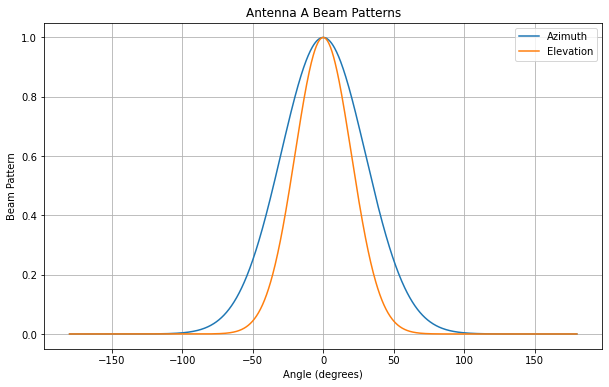

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(np.degrees(theta_range), beam_pattern_Azimuth, label='Azimuth')
plt.plot(np.degrees(theta_range), beam_pattern_Elevation, label='Elevation')
plt.xlabel('Angle (degrees)')
plt.ylabel('Beam Pattern')
plt.title('Antenna A Beam Patterns')
plt.legend()
plt.grid()
plt.show()

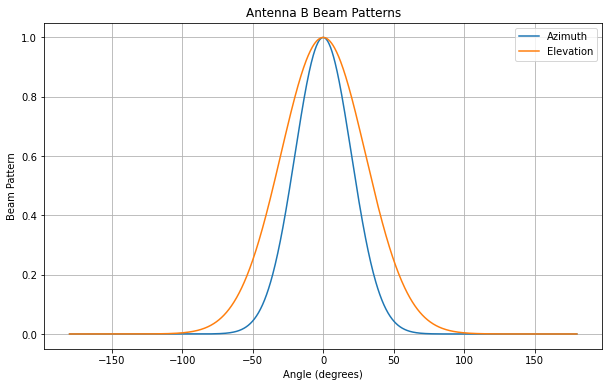

In [163]:
# Plot beam patterns for antenna B
plt.figure(figsize=(10, 6))
plt.plot(np.degrees(theta_range), beam_pattern_Azimuth_B, label='Azimuth')
plt.plot(np.degrees(theta_range), beam_pattern_Elevation_B, label='Elevation')
plt.xlabel('Angle (degrees)')
plt.ylabel('Beam Pattern')
plt.title('Antenna B Beam Patterns')
plt.legend()
plt.grid()
plt.show()

# <div align = 'center'><b>Main Script</b></div>

### Task 1.1: Generating a PySM Sky Model

In [13]:
pip install pysm

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install ephem

Note: you may need to restart the kernel to use updated packages.


In [62]:
# For computation and mathematics
import numpy as np
import math
import ephem
from scipy.signal import correlate
from scipy.optimize import curve_fit
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, RegularGridInterpolator

#For working with sky coordinates and similar such arrangements
import healpy as hp

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

#For generating sky model
import pysm3
import pysm3.units as u
from pysm3 import CMBMap

#Astronomical conversions
from astropy.timeseries import TimeSeries, BinnedTimeSeries
from astropy.time import Time, TimeDelta
from astropy.coordinates import Galactic, SkyCoord, FK5, EarthLocation, AltAz, Angle
import astropy.units as u

#For working with data sets
import pandas as pd


In [63]:
sky = pysm3.Sky(nside=16, preset_strings=["d1", "s1", "f1", "c1"])
#sky = pysm3.Sky(nside=1024, preset_strings=["s1"])

In [64]:
sky.components

In [65]:
# frequencies = np.linspace(2,4,100)*u.GHz
# freq = (2.88)*u.GHz
# #print(freq)
# print(type(frequencies))

In [66]:
pd.set_option('display.float_format', '{:.9f}'.format)   #setting the precision ofthe data taken
df = pd.read_csv("/home/rashi/APSERa/APSERa_S11_Simulation.csv", dtype={'column_name': float}, index_col = None) #importing csv file
frequencies = df["Frequency"].values
frequencies = frequencies
freqs = frequencies*u.GHz
print(frequencies.shape)
print(frequencies)

(1001,)
[2.         2.00200009 2.00399995 ... 3.99600005 3.99799991 4.        ]


In [67]:
S11 = df["S11"].values
print(type(S11))
Impedance = (50*(1+S11))/(1-S11)
print(Impedance.shape)

<class 'numpy.ndarray'>
(1001,)


In [86]:
freqs.shape

(1001,)

(3, 3072)


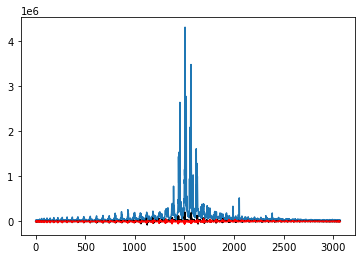

In [68]:
polarized_maps = sky.get_emission(freqs, weights=None)
print(polarized_maps.shape)
plt.plot((polarized_maps[0]))
plt.plot((polarized_maps[1]), color='k')
plt.plot((polarized_maps[2]), color ='red')

In [88]:
np.size(polarized_maps)

9216

In [9]:
print(polarized_maps.shape)

(3, 3072)


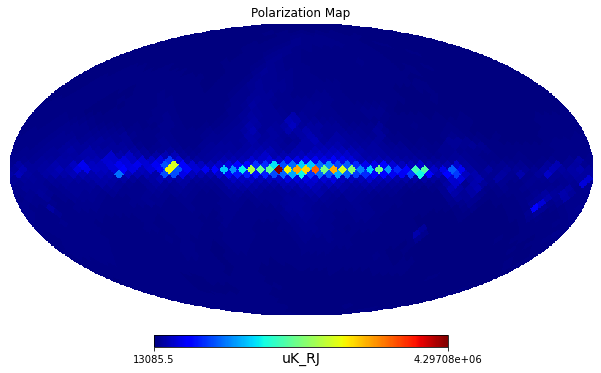

In [69]:
hp.mollview(polarized_maps[0,:], title='Polarization Map', cmap='jet', unit='uK_RJ')

### Task 2: Replace beam with analytical beam

In [70]:
#Getting time and number of spectra

from datetime import datetime   # importing datetime module

start_time_in_UTC = str(datetime.now())
#print(start_time_in_UTC)

n_spectra = 4                  #Number of spectra to be taken
delta_t_in_hours = 1            #Time interval between each spectra needed in hours

t = Time(start_time_in_UTC, format = 'iso', scale= 'utc')

ts = TimeSeries(time_start= start_time_in_UTC, time_delta= delta_t_in_hours *u.hour, n_samples= n_spectra)
ts = ts.time
print(ts)

['2023-08-25 12:44:24.422' '2023-08-25 13:44:24.422'
 '2023-08-25 14:44:24.422' '2023-08-25 15:44:24.422']


In [71]:
#Defining Antenna Beam

#Beam fucntion for Antenna 1
#Here: freq = frequency, alt = Altitude, az = Azimuth

def beam_def_A1(freq, alt, az):
    #return float(my_interpolating_function([freq, alt, az]))
    if (alt<=0):
        return 0
    else:
        return ((math.sin(alt*np.pi/180))**2)*(math.sin(az*np.pi/180))

In [72]:
#Beam fucntion for Antenna 2
#Here: freq = frequency, alt = Altitude, az = Azimuth

def beam_def_A2(freq, alt, az):
    #return float(my_interpolating_function([freq, alt, az]))
    if (alt<=0):
        return 0
    else:
        return ((math.sin(alt*np.pi/180))**2)*(math.cos(az*np.pi/180))

In [73]:
#Basic Definitions

h = 6.62607157e-34
k = 1.3806488e-23
c = 2.99792458e+08
TCMB = 2.72548
f_start = 2                  #Check the f_start and f_stop and change the number of channels accordingly
f_stop = 4
No_of_Channels = 1001          # no.of frequency channels i.e. number of frequencies into consideration
Channel_width = 0.01
nside = 16
T_hot = 3730
T_cold = 2730                    #T_cold and T_hot in Kelvins
Time_in_UTC = ts
latitude = 13.067439
longitude =80.237617            #Latitude and longitude in degrees
altitude = 0                     #Altitude in meters
alpha = 0.0065                   #Temp. lapse rate (deg C per meter)
PI = 3.14159265
Noise_int_time = 3e+13
Trx = 14
T_atm = 1
#freqs = np.linspace(f_start,f_stop, No_of_Channels)
CMB_Int = np.empty([No_of_Channels])
P_hot = np.empty(No_of_Channels)
P_cold = np.empty(No_of_Channels)
P_dif = np.empty(No_of_Channels)
cross_real = [0]*No_of_Channels
cross_imag = np.zeros(No_of_Channels)
sumwt = [0]*No_of_Channels
sigma = np.zeros(No_of_Channels)
spectra = [0]*n_spectra
spectra_cross_imag = [0]*n_spectra

cross_real2 = [0]*No_of_Channels
cross_imag2 = np.zeros(No_of_Channels)
sumwt2 = [0]*No_of_Channels
sigma2 = np.zeros(No_of_Channels)
spectra2 = [0]*n_spectra
spectra_cross_imag2 = [0]*n_spectra

cross_real3 = [0]*No_of_Channels
cross_imag3 = np.zeros(No_of_Channels)
sumwt3 = [0]*No_of_Channels
sigma3 = np.zeros(No_of_Channels)
spectra3 = [0]*n_spectra
spectra_cross_imag3 = [0]*n_spectra

cross_real4 = [0]*No_of_Channels
cross_imag4 = np.zeros(No_of_Channels)
sumwt4 = [0]*No_of_Channels
sigma4 = np.zeros(No_of_Channels)
spectra4 = [0]*n_spectra
spectra_cross_imag4 = [0]*n_spectra

npix = hp.nside2npix(nside)

In [74]:
#Refraction correction formula
def refraction(alt_in_deg, altitude):
    pres = 1010.*math.pow((1-6.5/288000*altitude),5.255)
    if (altitude>11000):
        temp = 211.5
    else:
        temp = 283.0 - (alpha * altitude)
    R = 1.02/math.tan((alt_in_deg + (10.3/(alt_in_deg + 5.11)))*(PI/180))
    if (alt_in_deg == 90):
        R = R+ 0.0019279
    tpcor = (pres/1000) * (283/temp)
    R =  tpcor*(R/60)
    return alt_in_deg +R

In [75]:
Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location= EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg, height=altitude*u.m))
lst = t.sidereal_time('apparent')
print(lst)

print(beam_def_A1(2.8,70,30))
print(beam_def_A2(2.8,70,30))

#plt.xlabel('Altitutde')
#plt.ylabel('Gain')
#plt.plot(theta_array_new[1:180],beam_3D_flip[50,1:180,0])



[16h19m27.56998255s 17h19m37.42675021s 18h19m47.28352222s
 19h19m57.14029852s]
0.44151111077974436
0.7647196759766884


In [76]:
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix), nest=True)
print (npix,theta, phi)
#plt.plot(theta,npix)
#plt.plot(phi,npix)

3072 [1.52911759 1.48736624 1.48736624 ... 1.65422641 1.65422641 1.61247506] [0.78539816 0.83448555 0.73631078 ... 5.54687453 5.44869976 5.49778714]


In [77]:
#P_hot and P_cold for calibration
P_hot = (2*h*frequencies*1e9)/(np.exp((h*frequencies*1e9)/(k*T_hot))-1)
P_cold = (2*h*frequencies*1e9)/(np.exp((h*frequencies*1e9)/(k*T_cold))-1)
P_dif = P_hot -P_cold

/tmp/ipykernel_24960/1922668801.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(recomb_file,sep= "    " ,header = None)


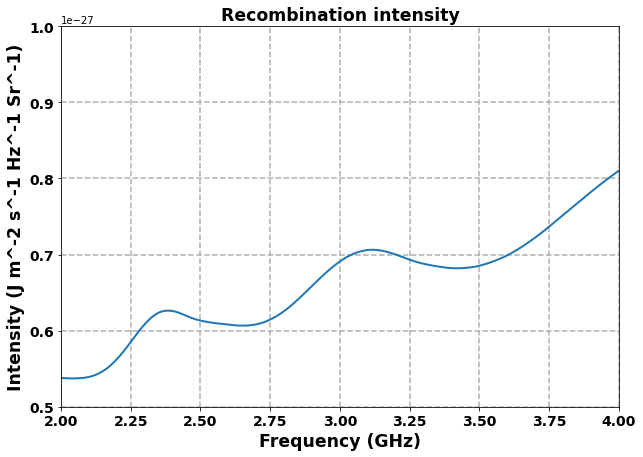

In [78]:
#Getting recombination lines

import os

recomb_path = "/home/rashi/APSERa/APSERa_Files"
recomb_file = os.path.join(recomb_path,'total_spec_new.txt')
df = pd.read_csv(recomb_file,sep= "    " ,header = None)
df.reset_index(drop=True, inplace=True)
df.columns = ["Frequency","Intensity"]

x = df["Frequency"]
y= df["Intensity"]

plt.figure(figsize=(10, 7))
plt.plot((df['Frequency']), (df['Intensity']),linewidth=2)
plt.title('Recombination intensity', fontsize='xx-large', fontweight='bold')
plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)', fontsize='xx-large', fontweight='bold')
plt.xlim([f_start,f_stop])
plt.ylim([0.5e-27,1e-27])
plt.xticks(fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 14, fontweight='bold')
plt.grid(linewidth=1.5, linestyle='--')
plt.show()

ius = InterpolatedUnivariateSpline(x, y)
Rec_int = ius(frequencies)


## Task 3: Getting Spectra

### Task 3.1.1: Getting CMB Intensity

In [91]:
cmb_model = pysm3.Sky(nside = 16, preset_strings = ['c1','c2'])
CMB_Int = cmb_model.get_emission(freqs, weights = None)
#CMB_Int = np.clip(CMB_Int, 0, None)
print(type(CMB_Int))
print(CMB_Int.shape)
print(CMB_Int[0])

<class 'astropy.units.quantity.Quantity'>
(3, 3072)
[ 79.3915945   68.98792953 -34.91155151 ...  96.38424858 170.03133582
 208.52513383] uK_RJ


In [80]:
CMB_Int.mean()

<Quantity 0.07748985 uK_RJ>

In [81]:
CMB_Int[:,1].shape

(3,)

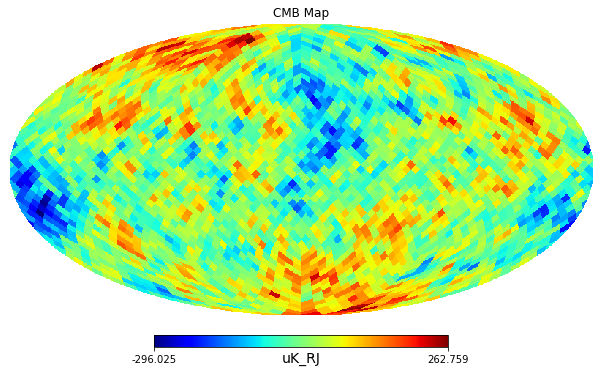

In [82]:
hp.mollview(CMB_Int[0,:], title='CMB Map', cmap='jet', unit='uK_RJ')

In [57]:
cmb_Int = ((2*h*1e+27*frequencies**3)/(c*c))/(np.exp((h*frequencies*1e+9)/(k*TCMB))-1)
print(cmb_Int.shape)

(1001,)


### Task 3.1.2: Actual CMB Intensity

In [39]:
cmb = pysm3.CMBMap(nside)

TypeError: __init__() got an unexpected keyword argument 'kind'

### Task 3.2: Spectra for Antenna 1

In [83]:
Voltage_A1 = [] 
Voltage_I = [] #Voltage for ideal antenna

In [84]:
t = 0
while t < n_spectra:
    i = 1
    while i < npix:           #Working on each pixel
        coords = hp.pixelfunc.pix2ang(16, i , nest = True, lonlat = True)          #Gives l and b coordinates for each pixel
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')
        
        #Now, the coordinates in Galactic frame is changed to equitorial frame below
        equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude) 
        
        j = 0
        longitudes = equi.az.value
        while j < No_of_Channels:
            if (longitudes>359.00):
                longitudes = 359.00
            cwt = beam_def_A1(frequencies[j], new_alt, longitudes) #weight associated with the specific frequency channel 
            #print(cwt)
            #print(type(cwt))
            #print(new_alt,cwt)
            #print(f"Spectrum {t+1}, Pixel {i}, Frequency {freqs[j]/1e9:.2f} GHz:")
            #print(f"   Altitude: {new_alt:.2f} degrees, Beam Response: {cwt:.2f}")
            
            if (cwt>0):     #Adding all the three intensities

                maps = (2 * k * 1e+18 * (frequencies[j]**2) * polarized_maps[0, i-1]) / (c**2)
                #print(maps)
                
                Power = (maps + CMB_Int[:,i-1] + ((Rec_int * maps.unit)[j])) * (c**2 / (1e+18 * frequencies[j]**2))
                #print(Power)
                
                Voltage_Ideal = np.sqrt(2 * Power * 50)  # Volate calculation for Antenna 1 with Z = 50 ohms
                #print(Voltage_Ideal)
                Voltage_I.append(Voltage_Ideal)
                
                Voltage_Real = np.sqrt(2 * Power * Impedance[j])  # Volate calculation for Antenna 1 with S11 values
                #print(Voltage_Real)
                Voltage_A1.append(Voltage_Real)
                
                final_temp = (Power/P_dif[j])*(T_hot-T_cold)
                #print(type(final_temp))
                
                cross_real[j] = cross_real[j] + cwt * final_temp.value
                #print(cross_real[j])
                
                sumwt[j] = sumwt[j]+ cwt
                #print(sumwt[j])
                        
            j += 1
            
            
        if (i%1000 == 0):
            print('Number of pixels got: ', i)
        
        i += 1
        
    i = 0
    while(i< No_of_Channels):
        if sumwt[i]>0:
            cross_real[i] = cross_real[i]/sumwt[i]
        i = i+1

    sigma = (np.array(cross_real) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)    
    #print(type(sigma))


    #Generating an array of random integers with mean 0 and std 1. 
    array = np.random.normal(0, 1, (No_of_Channels,))
    #print(type(sigma))
    

    #Adding the gaussian error


    cross_real = cross_real + array[:, np.newaxis] * sigma
    print(cross_real)
    #Comment out this line if you need spectra without noise. To vary the noise level, change Noise_int_time in definitions

    cross_imag = cross_imag + array[:, np.newaxis] * sigma[:, t]

    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag

    cross_real = [0]*No_of_Channels
    cross_imag = [0]*No_of_Channels
    sumwt = [0]*No_of_Channels
    sigma = np.zeros(No_of_Channels)

    print("No. of spectra got = ", t+1)


    t += 1 


/home/rashi/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000
[[5.09827666e+21 1.25165081e+18 1.39947275e+19]
 [5.08809491e+21 1.24915114e+18 1.39667787e+19]
 [5.07794483e+21 1.24665925e+18 1.39389168e+19]
 ...
 [1.27712210e+21 3.13539460e+17 3.50568966e+18]
 [1.27584475e+21 3.13225865e+17 3.50218335e+18]
 [1.27456916e+21 3.12912703e+17 3.49868188e+18]]
No. of spectra got =  1
Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000
[[-2.43127615e+21 -1.09211957e+19  1.84418959e+19]
 [-2.42642065e+21 -1.08993850e+19  1.84050657e+19]
 [-2.42158026e+21 -1.08776422e+19  1.83683500e+19]
 ...
 [-6.09036485e+20 -2.73576766e+18  4.61970867e+18]
 [-6.08427340e+20 -2.73303140e+18  4.61508814e+18]
 [-6.07819037e+20 -2.73029893e+18  4.61047399e+18]]
No. of spectra got =  2
Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000
[[-8.38409399e+21 -2.94307155e+19  3.33995581e+19]
 [-8.36735014e+21 -2.93719395e+19  3.333285

IndexError: index 3 is out of bounds for axis 0 with size 3

In [85]:
np.shape(cross_real)

(1001,)

In [28]:
spectra

[array([[2.00695515e+22, 6.81000599e+19, 1.02458082e+20],
        [2.00294706e+22, 6.79640575e+19, 1.02253464e+20],
        [1.99895145e+22, 6.78284782e+19, 1.02049481e+20],
        ...,
        [5.02743759e+21, 1.70591157e+19, 2.56658259e+19],
        [5.02240926e+21, 1.70420536e+19, 2.56401555e+19],
        [5.01738787e+21, 1.70250150e+19, 2.56145206e+19]]),
 array([[2.04050658e+22, 6.43759748e+19, 9.57027624e+19],
        [2.03643149e+22, 6.42474098e+19, 9.55116347e+19],
        [2.03236908e+22, 6.41192447e+19, 9.53211016e+19],
        ...,
        [5.11148417e+21, 1.61262296e+19, 2.39736132e+19],
        [5.10637178e+21, 1.61101005e+19, 2.39496354e+19],
        [5.10126645e+21, 1.60939937e+19, 2.39256906e+19]]),
 array([[2.03813858e+22, 5.84077479e+19, 9.22995882e+19],
        [2.03406822e+22, 5.82911020e+19, 9.21152570e+19],
        [2.03001052e+22, 5.81748189e+19, 9.19314992e+19],
        ...,
        [5.10555233e+21, 1.46311843e+19, 2.31211156e+19],
        [5.10044587e+21, 1.46

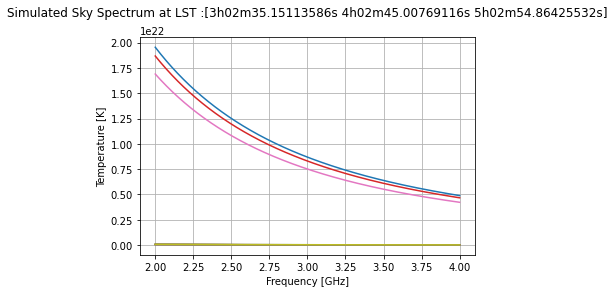

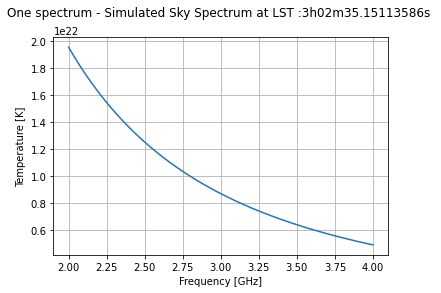

In [45]:
Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location=(longitude, latitude))
lst = t.sidereal_time('apparent')
    

i=0
while(i<n_spectra):
    plt.plot(freqs, spectra[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s\n '%lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra[0][:,0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s \n'%lst[0])
plt.grid()
plt.show()

In [ ]:
Voltage_A1 = np.array(Voltage_A1)
Voltage_I = np.array(Voltage_I)

In [32]:
len_eff = []       # finding effective length of the antenna based on frequencies
wavelength = [] 
for f in frequencies:
    wl = c*1e-9 / f
    wavelength.append(wl)
    length = c*1e-9 / (2 * f)
    len_eff.append(length)

In [33]:
len_eff = np.array(len_eff)

In [34]:
Ele_field_1 = []  #Finding electric field for antenna 1
for i in range(len(len_eff)):
    E = Voltage_A1[i] / len_eff[i] 
    Ele_field_1.append(E)
    
        

In [35]:
Ele_field_1

[array([1.46974688e+02, 1.31095304e-07, 1.31095304e-07]),
 array([1.47348633e+02, 1.31560283e-07, 1.31560283e-07]),
 array([1.47729248e+02, 1.32031874e-07, 1.32031874e-07]),
 array([1.48116164e+02, 1.32509796e-07, 1.32509796e-07]),
 array([1.48509051e+02, 1.32993742e-07, 1.32993742e-07]),
 array([1.48907584e+02, 1.33483463e-07, 1.33483463e-07]),
 array([1.49311457e+02, 1.33978688e-07, 1.33978688e-07]),
 array([1.49720380e+02, 1.34479154e-07, 1.34479154e-07]),
 array([1.50134082e+02, 1.34984661e-07, 1.34984661e-07]),
 array([1.50552297e+02, 1.35494953e-07, 1.35494953e-07]),
 array([1.50974789e+02, 1.36009859e-07, 1.36009859e-07]),
 array([1.51401327e+02, 1.36529168e-07, 1.36529168e-07]),
 array([1.51831686e+02, 1.37052671e-07, 1.37052671e-07]),
 array([1.52265665e+02, 1.37580228e-07, 1.37580228e-07]),
 array([1.52703058e+02, 1.38111646e-07, 1.38111646e-07]),
 array([1.53143685e+02, 1.38646758e-07, 1.38646758e-07]),
 array([1.53587374e+02, 1.39185446e-07, 1.39185446e-07]),
 array([1.5403

### Task 3.3: Spectra for Antenna 2

In [38]:
Voltage_A2 = [] 
Voltage_I2 = [] #Voltage for ideal antenna

In [39]:
t = 0
while t < n_spectra:
    i = 1
    while i < npix:           #Working on each pixel
        coords = hp.pixelfunc.pix2ang(16, i , nest = True, lonlat = True)          #Gives l and b coordinates for each pixel
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')
        
        #Now, the coordinates in Galactic frame is changed to equitorial frame below
        equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude) 
        
        j = 0
        longitudes = equi.az.value
        while j < No_of_Channels:
            if (longitudes>359.00):
                longitudes = 359.00
            cwt2 = beam_def_A2(frequencies[j], new_alt, longitudes) #weight associated with the specific frequency channel 
            
            if (cwt2>0):     #Adding all the three intensities

                maps2 = (2 * k * 1e+18 * (frequencies[j]**2) * polarized_maps[t, i-1]) / (c**2)
                #print(maps)
                
                Power2 = (maps2 + CMB_Int[:,i-1] + ((Rec_int * maps.unit)[j])) * (c**2 / (1e+18 * frequencies[j]**2))
                #print(Power2)
                
                Voltage_Ideal_A2 = np.sqrt(2 * Power * 50)  # Volate calculation for Antenna 1 with Z = 50 ohms
                #print(Voltage_Ideal)
                Voltage_I2.append(Voltage_Ideal_A2)
                
                Voltage_Real_A2 = np.sqrt(2 * Power * Impedance[j])  # Volate calculation for Antenna 1 with S11 values
                #print(Voltage_Real)
                Voltage_A2.append(Voltage_Real_A2)
                
                final_temp2 = (Power2/P_dif[j])*(T_hot-T_cold)
                #print(type(final_temp))
                
                cross_real2[j] = cross_real2[j] + cwt2 * final_temp2.value
                #print(cross_real[j])
                
                sumwt2[j] = sumwt2[j]+ cwt2
                #print(sumwt[j])
                        
            j += 1
            
            
        if (i%1000 == 0):
            print('Number of pixels got: ', i)
        
        i += 1
        
    i = 0
    while(i< No_of_Channels):
        if sumwt2[i]>0:
            cross_real2[i] = cross_real2[i]/sumwt2[i]
        i = i+1

    sigma2 = (np.array(cross_real2) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)    
    #print(type(sigma))


    #Generating an array of random integers with mean 0 and std 1. 
    array2 = np.random.normal(0, 1, (No_of_Channels,))

    #Adding the gaussian error


    cross_real2 = cross_real2 + array2[:, np.newaxis] * sigma2
    print(cross_real2)
    #Comment out this line if you need spectra without noise. To vary the noise level, change Noise_int_time in definitions

    cross_imag2 = cross_imag2 + array2[:, np.newaxis] * sigma2[:, t]

    spectra2[t] = cross_real2
    spectra_cross_imag2[t] = cross_imag2

    cross_real2 = [0]*No_of_Channels
    cross_imag2 = [0]*No_of_Channels
    sumwt2 = [0]*No_of_Channels
    sigma2 = np.zeros(No_of_Channels)

    print("No. of spectra got = ", t+1)


    t += 1 


Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000
[[2.45127145e+22 7.14596867e+19 5.88114210e+19]
 [2.44637603e+22 7.13169748e+19 5.86939689e+19]
 [2.44149583e+22 7.11747068e+19 5.85768821e+19]
 ...
 [6.14045325e+21 1.79007047e+19 1.47323047e+19]
 [6.13431170e+21 1.78828008e+19 1.47175698e+19]
 [6.12817864e+21 1.78649217e+19 1.47028552e+19]]
No. of spectra got =  1


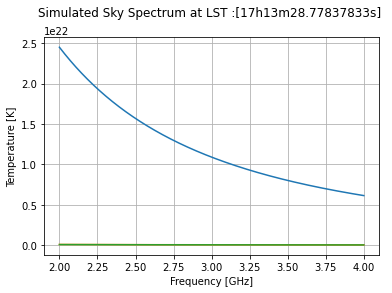

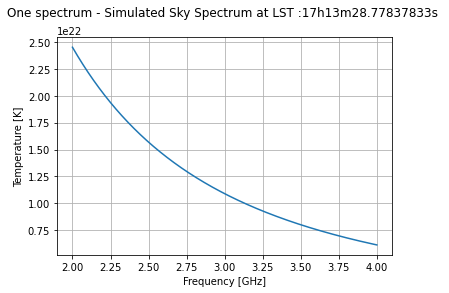

In [63]:
i=0
while(i<n_spectra):
    plt.plot(freqs, spectra2[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s \n'%lst)
plt.grid()
plt.show()

plt.plot(frequencies, spectra2[0][:,0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s \n'%lst[0])
plt.grid()
plt.show()

In [131]:
Voltage_A2 = np.array(Voltage_A2)
Voltage_I2 = np.array(Voltage_I2)

In [132]:
len_eff_2 = []       # finding effective length of the antenna based on frequencies
wavelength_2 = [] 
for f2 in frequencies:
    wl2 = c*1e-9 / f
    wavelength.append(wl2)
    length2 = c*1e-9 / (2 * f)
    len_eff_2.append(length2)

In [134]:
len_eff_2 = np.array(len_eff_2)

Ele_field_2 = []  #Finding electric field for antenna 1
for i in range(len(len_eff_2)):
    E2 = Voltage_A2[i] / len_eff_2[i] 
    Ele_field_2.append(E2)

In [135]:
Ele_field_1 = np.array(Ele_field_1) 
Ele_field_2 = np.array(Ele_field_2) 

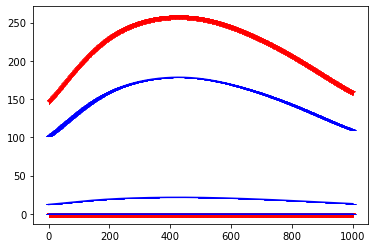

In [59]:
plt.plot(Ele_field_1, 'r', marker = '1')
plt.plot(Ele_field_2, 'b', marker = '_')

(1001, 3)


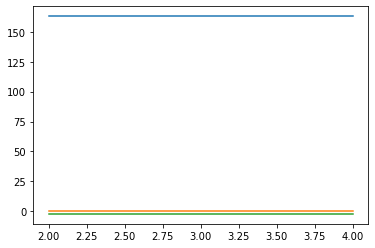

In [127]:
Q1 = []
# Q1 = (((Ele_field_1**2)/Impedance) -  ((Ele_field_2**2)/Impedance)) 
for im in range(len(Impedance)):
#     Q = ((Ele_field_1[im]**2)/Impedance[im]) - ((Ele_field_2[im]**2)/Impedance[im])
    Q = ((Ele_field_1[im]**2) - (Ele_field_2[im]**2))/Impedance[im]
    Q1.append(Q)
    
Q1 = np.array(Q1)

Q_test = (Ele_field_1**2) - (Ele_field_2**2)
print(Q1.shape)
plt.plot(frequencies, Q1)
#plt.plot(frequencies, Q1[0][:,0])

(1001, 3)


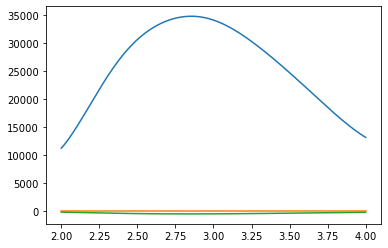

In [128]:
print(Q_test.shape)
plt.plot(frequencies, Q_test)

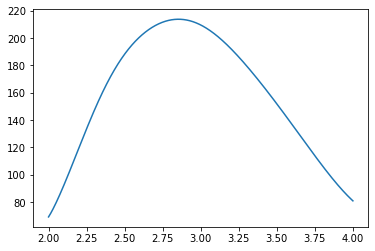

In [129]:
plt.plot(frequencies, Impedance )

### Task 3.4: Difference Spectra from both the antennas

In [24]:
Diff = np.array(spectra)-np.array(spectra2)
print(Diff.shape)

(1, 251, 3)


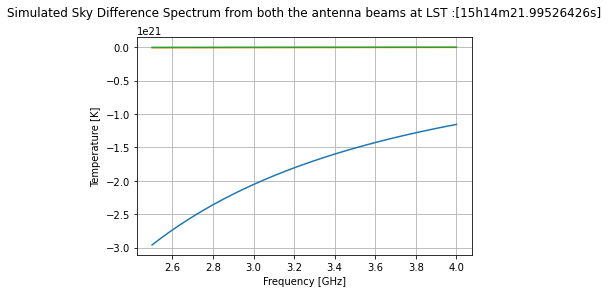

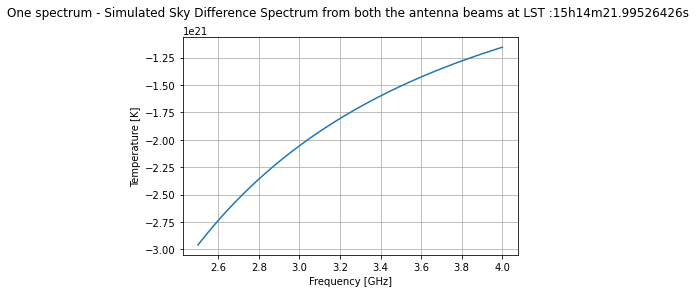

In [25]:
i=0
while(i<n_spectra):
    plt.plot(freqs, Diff[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Difference Spectrum from both the antenna beams at LST :%s\n '%lst)
plt.grid()
plt.show()

plt.plot(freqs, Diff[0][:,0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Difference Spectrum from both the antenna beams at LST :%s \n'%lst[0])
plt.grid()
plt.show()

### Task 4: Replacing antennas beams with a different analytical beam (Spherical Harmonic Functions)

In [26]:
#Defining Antenna Beam 2

#Beam fucntion for Antenna 1
#Here: freq = frequency, alt = Altitude, az = Azimuth

def beam_def2_A1(freq, alt, az):
    #return float(my_interpolating_function([freq, alt, az]))
    if (alt<=0):
        return 0
    else:
        return (math.sqrt(3/(4*np.pi))*math.sin(alt*np.pi/180)*(math.cos(az*np.pi/180)))
    
#Defining Antenna Beam

#Beam fucntion for Antenna 2
#Here: freq = frequency, alt = Altitude, az = Azimuth

def beam_def2_A2(freq, alt, az):
    #return float(my_interpolating_function([freq, alt, az]))
    if (alt<=0):
        return 0
    else:
        return (math.sqrt(3/(4*np.pi))*math.sin(alt*np.pi/180)*(math.sin(az*np.pi/180)))
    

In [27]:
t = 0
while t < n_spectra:
    i = 1
    while i < npix:           #Working on each pixel
        coords = hp.pixelfunc.pix2ang(16, i , nest = True, lonlat = True)          #Gives l and b coordinates for each pixel
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')
        
        #Now, the coordinates in Galactic frame is changed to equitorial frame below
        equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude) 
        
        j = 0
        longitudes = equi.az.value
        while j < No_of_Channels:
            if (longitudes>359.00):
                longitudes = 359.00
            cwt3 = beam_def2_A1(freqs[j], new_alt, longitudes) #weight associated with the specific frequency channel 
            #print(type(cwt))
            #print(new_alt,cwt)
            #print(f"Spectrum {t+1}, Pixel {i}, Frequency {freqs[j]/1e9:.2f} GHz:")
            #print(f"   Altitude: {new_alt:.2f} degrees, Beam Response: {cwt:.2f}")
            
            if (cwt3>0):     #Adding all the three intensities

                maps3 = (2 * k * 1e+18 * (freqs[j]**2) * polarized_maps[t, i-1]) / (c**2)
                #print(maps)
                
                Power3 = (maps3 + CMB_Int[:,i-1] + ((Rec_int * maps.unit)[j])) * (c**2 / (1e+18 * freqs[j]**2))
                #print(Power.shape)
                
                final_temp3 = (Power3/P_dif[j])*(T_hot-T_cold)
                #print(type(final_temp))
                
                cross_real3[j] = cross_real3[j] + cwt3 * final_temp3.value
                #print(cross_real[j])
                
                sumwt3[j] = sumwt3[j]+ cwt3
                #print(sumwt[j])
                        
            j += 1
            
            
        if (i%1000 == 0):
            print('Number of pixels got: ', i)
        
        i += 1
        
    i = 0
    while(i< No_of_Channels):
        if sumwt3[i]>0:
            cross_real3[i] = cross_real3[i]/sumwt3[i]
        i = i+1

    sigma3 = (np.array(cross_real3) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)    
    #print(type(sigma))


    #Generating an array of random integers with mean 0 and std 1. 
    array3 = np.random.normal(0, 1, (No_of_Channels,))  

    #Adding the gaussian error


    cross_real3 = cross_real3 + array3[:, np.newaxis] * sigma3
    print(cross_real3)
    #Comment out this line if you need spectra without noise. To vary the noise level, change Noise_int_time in definitions

    cross_imag3 = cross_imag3 + array3[:, np.newaxis] * sigma3[:, t]

    spectra3[t] = cross_real3
    spectra_cross_imag3[t] = cross_imag3

    cross_real3 = [0]*No_of_Channels
    cross_imag3 = [0]*No_of_Channels
    sumwt3 = [0]*No_of_Channels
    sigma3 = np.zeros(No_of_Channels)

    print("No. of spectra got = ", t+1)


    t += 1 

Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000
[[1.51305607e+22 6.64654024e+19 7.99033124e+19]
 [1.50581946e+22 6.61475133e+19 7.95211529e+19]
 [1.49863465e+22 6.58318994e+19 7.91417284e+19]
 [1.49150113e+22 6.55185390e+19 7.87650131e+19]
 [1.48441843e+22 6.52074106e+19 7.83909811e+19]
 [1.47738606e+22 6.48984932e+19 7.80196071e+19]
 [1.47040354e+22 6.45917658e+19 7.76508658e+19]
 [1.46347041e+22 6.42872078e+19 7.72847326e+19]
 [1.45658620e+22 6.39847988e+19 7.69211828e+19]
 [1.44975045e+22 6.36845186e+19 7.65601922e+19]
 [1.44296271e+22 6.33863472e+19 7.62017369e+19]
 [1.43622253e+22 6.30902650e+19 7.58457931e+19]
 [1.42952946e+22 6.27962525e+19 7.54923374e+19]
 [1.42288307e+22 6.25042905e+19 7.51413468e+19]
 [1.41628293e+22 6.22143599e+19 7.47927983e+19]
 [1.40972860e+22 6.19264419e+19 7.44466694e+19]
 [1.40321967e+22 6.16405180e+19 7.41029376e+19]
 [1.39675571e+22 6.13565697e+19 7.37615810e+19]
 [1.39033631e+22 6.10745790e+19 7.34225776e+19]
 [1.

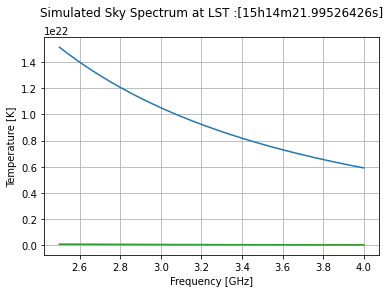

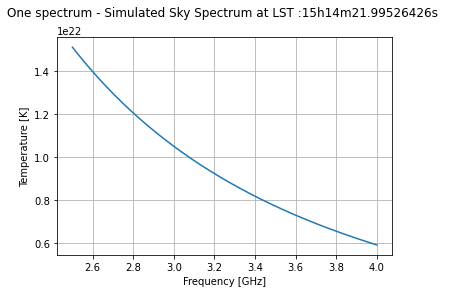

In [28]:
i=0
while(i<n_spectra):
    plt.plot(freqs, spectra3[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s\n'%lst)
plt.grid()
plt.show()

plt.plot(freqs, spectra3[0][:,0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s \n'%lst[0])
plt.grid()
plt.show()

In [29]:
t = 0
while t < n_spectra:
    i = 1
    while i < npix:           #Working on each pixel
        coords = hp.pixelfunc.pix2ang(16, i , nest = True, lonlat = True)          #Gives l and b coordinates for each pixel
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')
        
        #Now, the coordinates in Galactic frame is changed to equitorial frame below
        equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude) 
        
        j = 0
        longitudes = equi.az.value
        while j < No_of_Channels:
            if (longitudes>359.00):
                longitudes = 359.00
            cwt4 = beam_def2_A2(freqs[j], new_alt, longitudes) #weight associated with the specific frequency channel 
            #print(type(cwt))
            #print(new_alt,cwt)
            #print(f"Spectrum {t+1}, Pixel {i}, Frequency {freqs[j]/1e9:.2f} GHz:")
            #print(f"   Altitude: {new_alt:.2f} degrees, Beam Response: {cwt:.2f}")
            
            if (cwt4>0):     #Adding all the three intensities

                maps4 = (2 * k * 1e+18 * (freqs[j]**2) * polarized_maps[t, i-1]) / (c**2)
                #print(maps)
                
                Power4 = (maps4 + CMB_Int[:,i-1] + ((Rec_int * maps.unit)[j])) * (c**2 / (1e+18 * freqs[j]**2))
                #print(Power.shape)
                
                final_temp4 = (Power4/P_dif[j])*(T_hot-T_cold)
                #print(type(final_temp))
                
                cross_real4[j] = cross_real4[j] + cwt4 * final_temp4.value
                #print(cross_real[j])
                
                sumwt4[j] = sumwt4[j]+ cwt4
                #print(sumwt[j])
                        
            j += 1
            
            
        if (i%1000 == 0):
            print('Number of pixels got: ', i)
        
        i += 1
        
    i = 0
    while(i< No_of_Channels):
        if sumwt4[i]>0:
            cross_real4[i] = cross_real4[i]/sumwt4[i]
        i = i+1

    sigma4 = (np.array(cross_real4) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)    
    #print(type(sigma))


    #Generating an array of random integers with mean 0 and std 1. 
    array4 = np.random.normal(0, 1, (No_of_Channels,))  

    #Adding the gaussian error


    cross_real4 = cross_real4 + array4[:, np.newaxis] * sigma4
    print(cross_real4)
    #Comment out this line if you need spectra without noise. To vary the noise level, change Noise_int_time in definitions

    cross_imag4 = cross_imag4 + array4[:, np.newaxis] * sigma4[:, t]

    spectra4[t] = cross_real4
    spectra_cross_imag4[t] = cross_imag4

    cross_real4 = [0]*No_of_Channels
    cross_imag4 = [0]*No_of_Channels
    sumwt4 = [0]*No_of_Channels
    sigma4 = np.zeros(No_of_Channels)

    print("No. of spectra got = ", t+1)


    t += 1 

Number of pixels got:  1000
Number of pixels got:  2000
Number of pixels got:  3000
[[1.12766348e+22 5.66148189e+19 7.82892425e+19]
 [1.12227012e+22 5.63440430e+19 7.79148027e+19]
 [1.11691536e+22 5.60752050e+19 7.75430427e+19]
 [1.11159884e+22 5.58082865e+19 7.71739371e+19]
 [1.10632018e+22 5.55432693e+19 7.68074607e+19]
 [1.10107903e+22 5.52801353e+19 7.64435885e+19]
 [1.09587504e+22 5.50188668e+19 7.60822960e+19]
 [1.09070786e+22 5.47594462e+19 7.57235587e+19]
 [1.08557714e+22 5.45018561e+19 7.53673527e+19]
 [1.08048253e+22 5.42460792e+19 7.50136543e+19]
 [1.07542370e+22 5.39920987e+19 7.46624398e+19]
 [1.07040032e+22 5.37398977e+19 7.43136862e+19]
 [1.06541205e+22 5.34894597e+19 7.39673705e+19]
 [1.06045858e+22 5.32407683e+19 7.36234700e+19]
 [1.05553956e+22 5.29938072e+19 7.32819622e+19]
 [1.05065470e+22 5.27485604e+19 7.29428252e+19]
 [1.04580366e+22 5.25050122e+19 7.26060369e+19]
 [1.04098615e+22 5.22631468e+19 7.22715758e+19]
 [1.03620184e+22 5.20229488e+19 7.19394204e+19]
 [1.

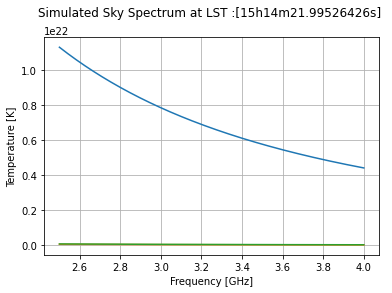

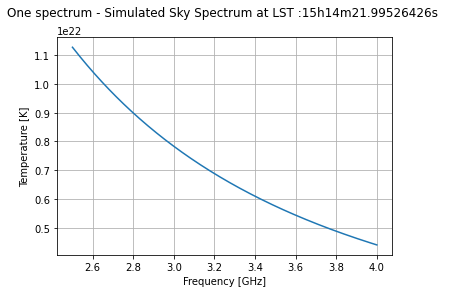

In [30]:
i=0
while(i<n_spectra):
    plt.plot(freqs, spectra4[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s \n'%lst)
plt.grid()
plt.show()

plt.plot(freqs, spectra4[0][:,0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s \n'%lst[0])
plt.grid()
plt.show()

In [31]:
Diff2 = np.array(spectra3)-np.array(spectra4)
print(Diff2.shape)

(1, 251, 3)


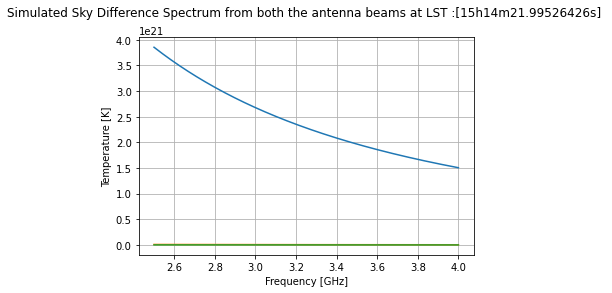

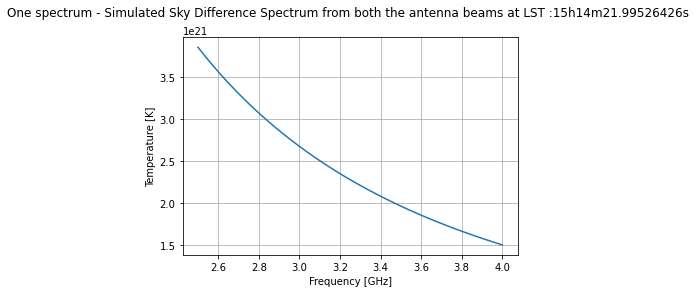

In [32]:
i=0
while(i<n_spectra):
    plt.plot(freqs, Diff2[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Difference Spectrum from both the antenna beams at LST :%s \n'%lst)
plt.grid()
plt.show()

plt.plot(freqs, Diff2[0][:,0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Difference Spectrum from both the antenna beams at LST :%s \n'%lst[0])
plt.grid()
plt.show()

### Task 5: Power conversion to Voltage

In [ ]:
# Volate calculation for Antenna 1 with Z = 50 ohms
Voltage = math.sqrt(2 * Power * 50)